In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time
from pandas import read_csv

In [11]:
input_file="usd-inr-5-nh.csv"

In [12]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
np.random.seed(5)

In [14]:
df=read_csv(input_file,header=None,index_col=None,delimiter=',')

In [15]:
all_y = df[1].values
dataset=all_y.reshape(-1, 1)

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [17]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [28]:
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [30]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=50, verbose=1)

Epoch 1/1000
646/646 [==============================] - 3s 5ms/step - loss: 0.0570
Epoch 2/1000
646/646 [==============================] - 0s 227us/step - loss: 0.0199
Epoch 3/1000
646/646 [==============================] - 0s 244us/step - loss: 0.0130
Epoch 4/1000
646/646 [==============================] - 0s 253us/step - loss: 0.0093
Epoch 5/1000
646/646 [==============================] - 0s 288us/step - loss: 0.0092
Epoch 6/1000
646/646 [==============================] - 0s 280us/step - loss: 0.0086
Epoch 7/1000
646/646 [==============================] - 0s 353us/step - loss: 0.0073
Epoch 8/1000
646/646 [==============================] - 0s 262us/step - loss: 0.0068
Epoch 9/1000
646/646 [==============================] - 0s 231us/step - loss: 0.0071
Epoch 10/1000
646/646 [==============================] - 0s 270us/step - loss: 0.0064
Epoch 11/1000
646/646 [==============================] - 0s 274us/step - loss: 0.0065
Epoch 12/1000
646/646 [==============================] - 0s 262us

646/646 [==============================] - 0s 257us/step - loss: 0.0019
Epoch 97/1000
646/646 [==============================] - 0s 298us/step - loss: 0.0019
Epoch 98/1000
646/646 [==============================] - 0s 231us/step - loss: 0.0016
Epoch 99/1000
646/646 [==============================] - 0s 260us/step - loss: 0.0016
Epoch 100/1000
646/646 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 101/1000
646/646 [==============================] - 0s 245us/step - loss: 0.0016
Epoch 102/1000
646/646 [==============================] - 0s 274us/step - loss: 0.0017
Epoch 103/1000
646/646 [==============================] - 0s 338us/step - loss: 0.0018
Epoch 104/1000
646/646 [==============================] - 0s 254us/step - loss: 0.0017
Epoch 105/1000
646/646 [==============================] - 0s 269us/step - loss: 0.0018
Epoch 106/1000
646/646 [==============================] - 0s 261us/step - loss: 0.0018
Epoch 107/1000
646/646 [==============================] - 0s 

646/646 [==============================] - 0s 256us/step - loss: 0.0013
Epoch 191/1000
646/646 [==============================] - 0s 228us/step - loss: 0.0011
Epoch 192/1000
646/646 [==============================] - 0s 220us/step - loss: 0.0012
Epoch 193/1000
646/646 [==============================] - 0s 176us/step - loss: 0.0012
Epoch 194/1000
646/646 [==============================] - 0s 161us/step - loss: 0.0012
Epoch 195/1000
646/646 [==============================] - 0s 168us/step - loss: 0.0012
Epoch 196/1000
646/646 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 197/1000
646/646 [==============================] - 0s 289us/step - loss: 0.0012
Epoch 198/1000
646/646 [==============================] - 0s 340us/step - loss: 0.0011
Epoch 199/1000
646/646 [==============================] - 0s 207us/step - loss: 0.0011
Epoch 200/1000
646/646 [==============================] - 0s 246us/step - loss: 0.0011
Epoch 201/1000
646/646 [==============================] - 

646/646 [==============================] - 0s 221us/step - loss: 9.9289e-04
Epoch 284/1000
646/646 [==============================] - 0s 277us/step - loss: 9.6886e-04
Epoch 285/1000
646/646 [==============================] - 0s 218us/step - loss: 8.6336e-04
Epoch 286/1000
646/646 [==============================] - 0s 232us/step - loss: 0.0010
Epoch 287/1000
646/646 [==============================] - 0s 174us/step - loss: 0.0011
Epoch 288/1000
646/646 [==============================] - 0s 86us/step - loss: 8.0639e-04
Epoch 289/1000
646/646 [==============================] - 0s 89us/step - loss: 9.5802e-04
Epoch 290/1000
646/646 [==============================] - 0s 79us/step - loss: 8.9247e-04
Epoch 291/1000
646/646 [==============================] - 0s 88us/step - loss: 9.4202e-04
Epoch 292/1000
646/646 [==============================] - 0s 115us/step - loss: 9.2561e-04
Epoch 293/1000
646/646 [==============================] - 0s 130us/step - loss: 0.0010
Epoch 294/1000
646/646 [======

646/646 [==============================] - 0s 80us/step - loss: 8.1144e-04
Epoch 375/1000
646/646 [==============================] - 0s 81us/step - loss: 7.3519e-04
Epoch 376/1000
646/646 [==============================] - 0s 91us/step - loss: 6.8844e-04
Epoch 377/1000
646/646 [==============================] - 0s 126us/step - loss: 6.8975e-04
Epoch 378/1000
646/646 [==============================] - 0s 187us/step - loss: 7.0390e-04
Epoch 379/1000
646/646 [==============================] - 0s 216us/step - loss: 8.3551e-04
Epoch 380/1000
646/646 [==============================] - 0s 173us/step - loss: 8.8147e-04
Epoch 381/1000
646/646 [==============================] - 0s 159us/step - loss: 8.1377e-04
Epoch 382/1000
646/646 [==============================] - 0s 207us/step - loss: 6.9914e-04
Epoch 383/1000
646/646 [==============================] - 0s 91us/step - loss: 6.6877e-04
Epoch 384/1000
646/646 [==============================] - 0s 85us/step - loss: 6.7882e-04
Epoch 385/1000
646/

646/646 [==============================] - 0s 194us/step - loss: 6.7373e-04
Epoch 465/1000
646/646 [==============================] - 0s 219us/step - loss: 5.2581e-04
Epoch 466/1000
646/646 [==============================] - 0s 163us/step - loss: 7.2913e-04
Epoch 467/1000
646/646 [==============================] - 0s 177us/step - loss: 6.1248e-04
Epoch 468/1000
646/646 [==============================] - 0s 225us/step - loss: 5.8991e-04
Epoch 469/1000
646/646 [==============================] - 0s 203us/step - loss: 5.7415e-04
Epoch 470/1000
646/646 [==============================] - 0s 156us/step - loss: 5.8084e-04
Epoch 471/1000
646/646 [==============================] - 0s 158us/step - loss: 5.5985e-04
Epoch 472/1000
646/646 [==============================] - 0s 154us/step - loss: 5.7127e-04
Epoch 473/1000
646/646 [==============================] - 0s 175us/step - loss: 5.2695e-04
Epoch 474/1000
646/646 [==============================] - 0s 155us/step - loss: 5.6237e-04
Epoch 475/1000

646/646 [==============================] - 0s 79us/step - loss: 5.7572e-04
Epoch 555/1000
646/646 [==============================] - 0s 78us/step - loss: 6.2054e-04
Epoch 556/1000
646/646 [==============================] - 0s 85us/step - loss: 5.3478e-04
Epoch 557/1000
646/646 [==============================] - 0s 78us/step - loss: 6.0205e-04
Epoch 558/1000
646/646 [==============================] - 0s 77us/step - loss: 5.8575e-04
Epoch 559/1000
646/646 [==============================] - 0s 118us/step - loss: 6.1353e-04
Epoch 560/1000
646/646 [==============================] - 0s 113us/step - loss: 5.5557e-04
Epoch 561/1000
646/646 [==============================] - 0s 109us/step - loss: 4.8662e-04
Epoch 562/1000
646/646 [==============================] - 0s 118us/step - loss: 5.9059e-04
Epoch 563/1000
646/646 [==============================] - 0s 86us/step - loss: 5.8154e-04
Epoch 564/1000
646/646 [==============================] - 0s 76us/step - loss: 5.0492e-04
Epoch 565/1000
646/64

646/646 [==============================] - 0s 112us/step - loss: 5.3173e-04
Epoch 645/1000
646/646 [==============================] - 0s 77us/step - loss: 5.2672e-04
Epoch 646/1000
646/646 [==============================] - 0s 106us/step - loss: 6.3180e-04
Epoch 647/1000
646/646 [==============================] - 0s 79us/step - loss: 4.0598e-04
Epoch 648/1000
646/646 [==============================] - 0s 78us/step - loss: 4.7513e-04
Epoch 649/1000
646/646 [==============================] - 0s 86us/step - loss: 4.6468e-04
Epoch 650/1000
646/646 [==============================] - 0s 90us/step - loss: 5.3063e-04
Epoch 651/1000
646/646 [==============================] - 0s 81us/step - loss: 4.8832e-04
Epoch 652/1000
646/646 [==============================] - 0s 82us/step - loss: 5.8635e-04
Epoch 653/1000
646/646 [==============================] - 0s 154us/step - loss: 5.7347e-04
Epoch 654/1000
646/646 [==============================] - 0s 157us/step - loss: 5.1109e-04
Epoch 655/1000
646/64

646/646 [==============================] - 0s 202us/step - loss: 5.2593e-04
Epoch 735/1000
646/646 [==============================] - 0s 165us/step - loss: 5.7567e-04
Epoch 736/1000
646/646 [==============================] - 0s 169us/step - loss: 4.6538e-04
Epoch 737/1000
646/646 [==============================] - 0s 186us/step - loss: 4.5736e-04
Epoch 738/1000
646/646 [==============================] - 0s 144us/step - loss: 5.4549e-04
Epoch 739/1000
646/646 [==============================] - 0s 160us/step - loss: 4.9801e-04
Epoch 740/1000
646/646 [==============================] - 0s 220us/step - loss: 4.7881e-04
Epoch 741/1000
646/646 [==============================] - 0s 168us/step - loss: 5.0634e-04
Epoch 742/1000
646/646 [==============================] - 0s 144us/step - loss: 4.7687e-04
Epoch 743/1000
646/646 [==============================] - 0s 111us/step - loss: 4.9977e-04
Epoch 744/1000
646/646 [==============================] - 0s 101us/step - loss: 4.8499e-04
Epoch 745/1000

646/646 [==============================] - 0s 163us/step - loss: 4.6041e-04
Epoch 825/1000
646/646 [==============================] - 0s 139us/step - loss: 5.3859e-04
Epoch 826/1000
646/646 [==============================] - 0s 146us/step - loss: 4.6064e-04
Epoch 827/1000
646/646 [==============================] - 0s 242us/step - loss: 4.4386e-04
Epoch 828/1000
646/646 [==============================] - 0s 256us/step - loss: 4.6374e-04
Epoch 829/1000
646/646 [==============================] - 0s 252us/step - loss: 4.3992e-04
Epoch 830/1000
646/646 [==============================] - 0s 126us/step - loss: 4.3802e-04
Epoch 831/1000
646/646 [==============================] - 0s 119us/step - loss: 5.1447e-04
Epoch 832/1000
646/646 [==============================] - 0s 79us/step - loss: 5.0140e-04
Epoch 833/1000
646/646 [==============================] - 0s 149us/step - loss: 5.1956e-04
Epoch 834/1000
646/646 [==============================] - 0s 144us/step - loss: 5.4594e-04
Epoch 835/1000


646/646 [==============================] - 0s 253us/step - loss: 4.0199e-04
Epoch 915/1000
646/646 [==============================] - 0s 222us/step - loss: 5.8783e-04
Epoch 916/1000
646/646 [==============================] - 0s 133us/step - loss: 4.4565e-04
Epoch 917/1000
646/646 [==============================] - 0s 213us/step - loss: 5.4362e-04
Epoch 918/1000
646/646 [==============================] - 0s 197us/step - loss: 4.5632e-04
Epoch 919/1000
646/646 [==============================] - 0s 239us/step - loss: 4.5993e-04
Epoch 920/1000
646/646 [==============================] - 0s 200us/step - loss: 5.0466e-04
Epoch 921/1000
646/646 [==============================] - 0s 127us/step - loss: 4.1563e-04
Epoch 922/1000
646/646 [==============================] - 0s 155us/step - loss: 4.8749e-04
Epoch 923/1000
646/646 [==============================] - 0s 185us/step - loss: 5.0577e-04
Epoch 924/1000
646/646 [==============================] - 0s 183us/step - loss: 5.2483e-04
Epoch 925/1000

In [31]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [32]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [33]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.26 RMSE
Test Score: 0.43 RMSE


In [34]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [35]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


testPrices:


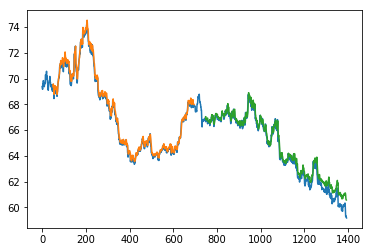

In [36]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
plt.plot(testPredictPlot)
plt.show()

In [37]:
print('testPredictions:')
print(testPredict)


testPredictions:
[[67.003944]
 [67.02507 ]
 [67.045746]
 [66.79904 ]
 [66.83734 ]
 [66.85547 ]
 [66.79953 ]
 [66.80201 ]
 [66.882744]
 [66.89141 ]
 [66.93719 ]
 [66.72048 ]
 [66.67446 ]
 [66.671555]
 [66.66154 ]
 [66.63083 ]
 [66.60332 ]
 [66.6241  ]
 [66.618004]
 [66.66403 ]
 [66.81259 ]
 [66.567955]
 [66.51241 ]
 [66.722855]
 [66.72051 ]
 [66.689476]
 [66.62212 ]
 [66.74952 ]
 [67.02639 ]
 [67.16811 ]
 [67.14824 ]
 [67.18871 ]
 [66.98864 ]
 [66.92622 ]
 [67.13903 ]
 [66.91389 ]
 [66.84916 ]
 [66.99511 ]
 [66.74831 ]
 [66.66303 ]
 [66.44982 ]
 [66.499916]
 [66.649956]
 [66.787025]
 [66.834854]
 [66.98951 ]
 [67.18277 ]
 [67.25806 ]
 [67.28511 ]
 [67.29057 ]
 [67.15713 ]
 [67.19708 ]
 [67.22014 ]
 [67.21822 ]
 [67.20593 ]
 [67.22677 ]
 [67.046074]
 [67.038795]
 [67.042046]
 [66.96033 ]
 [67.01046 ]
 [66.96016 ]
 [66.87331 ]
 [66.864456]
 [66.89701 ]
 [66.88886 ]
 [66.96668 ]
 [66.89857 ]
 [66.903305]
 [66.87686 ]
 [66.82509 ]
 [66.84375 ]
 [66.7942  ]
 [66.75088 ]
 [67.014984]
 [67.136